In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'
from keras.models import load_model

Using TensorFlow backend.
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/data/bitt/wzq

In [2]:
model = load_model('cats_and_dogs_small.h5')


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
img_path = './data/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np

In [5]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)

In [6]:
img_tensor.shape

(150, 150, 3)

In [7]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [8]:
img_tensor.shape

(1, 150, 150, 3)

In [9]:
img_tensor /= 255.

In [10]:
import matplotlib.pyplot as plt

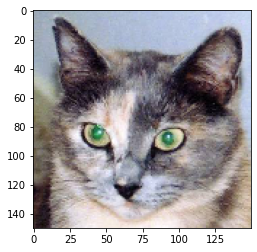

In [11]:
plt.imshow(img_tensor[0])
plt.show()

In [12]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
print(layer_outputs)

[<tf.Tensor 'conv2d_1/Relu:0' shape=(?, 148, 148, 32) dtype=float32>, <tf.Tensor 'max_pooling2d_1/MaxPool:0' shape=(?, 74, 74, 32) dtype=float32>, <tf.Tensor 'conv2d_2/Relu:0' shape=(?, 72, 72, 64) dtype=float32>, <tf.Tensor 'max_pooling2d_2/MaxPool:0' shape=(?, 36, 36, 64) dtype=float32>, <tf.Tensor 'conv2d_3/Relu:0' shape=(?, 34, 34, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_3/MaxPool:0' shape=(?, 17, 17, 128) dtype=float32>, <tf.Tensor 'conv2d_4/Relu:0' shape=(?, 15, 15, 128) dtype=float32>, <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>]


In [13]:
activation_model = models.Model(inputs=model.input, output=layer_outputs)

/data/bitt/wzq/anaconda3/envs/tf_gpu/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [14]:
activations = activation_model.predict(img_tensor)

In [15]:
first_layer_activation = activations[0]

In [16]:
print(first_layer_activation.shape)

(1, 148, 148, 32)


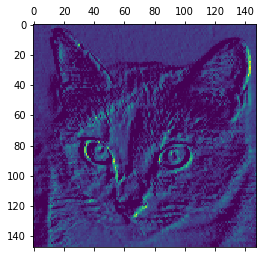

In [22]:
plt.matshow(first_layer_activation[0, :, :, 5])

In [18]:
layer_name = []
for layer in model.layers[:8]:
    layer_name.append(layer.name)

In [19]:
print(layer_name)

['conv2d_1', 'max_pooling2d_1', 'conv2d_2', 'max_pooling2d_2', 'conv2d_3', 'max_pooling2d_3', 'conv2d_4', 'max_pooling2d_4']


In [20]:
images_per_row = 16

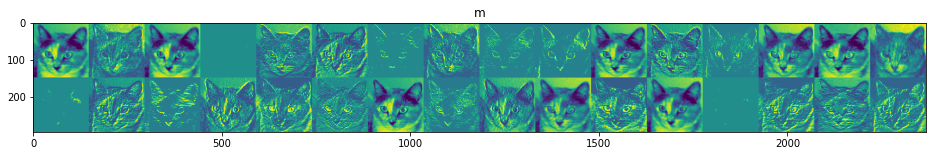

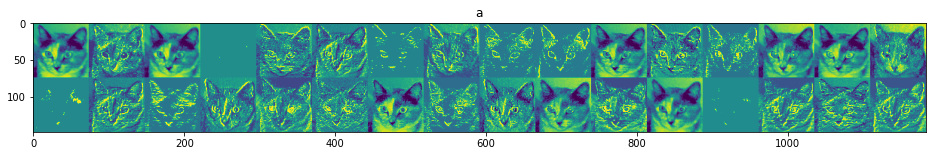

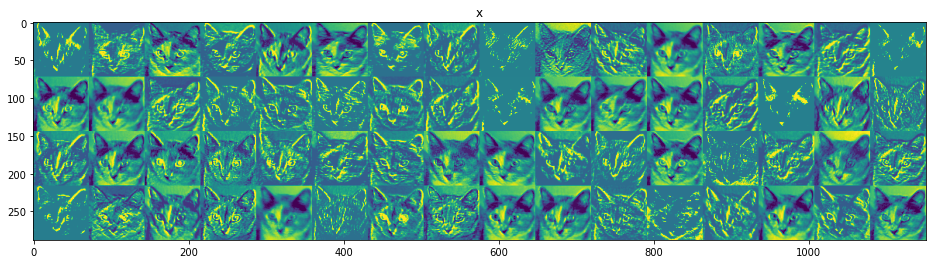

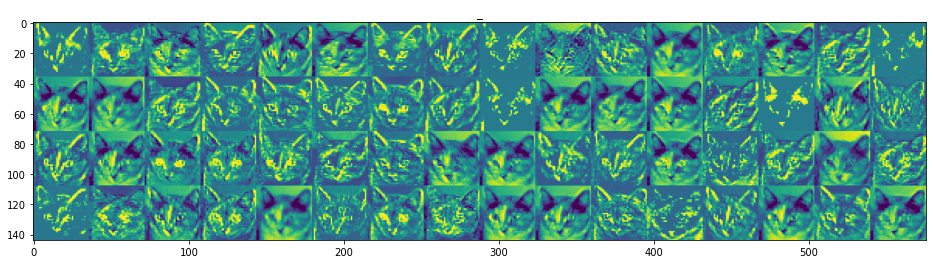

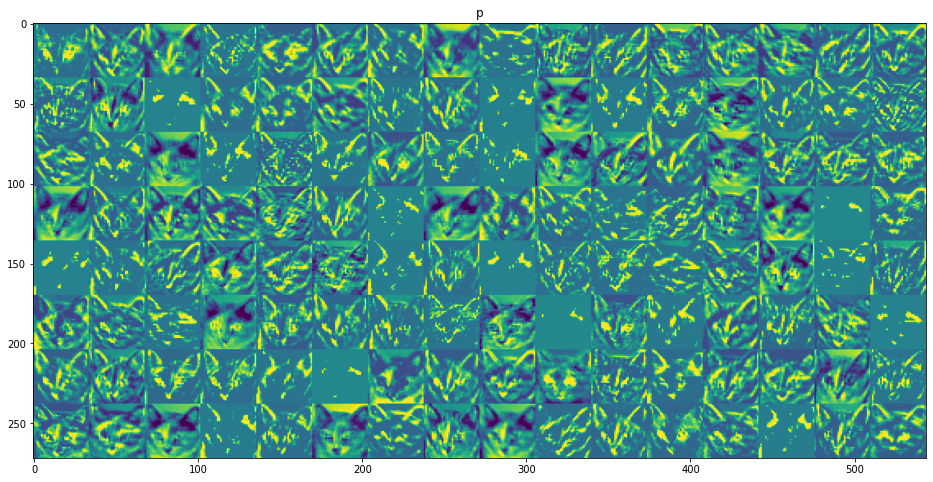

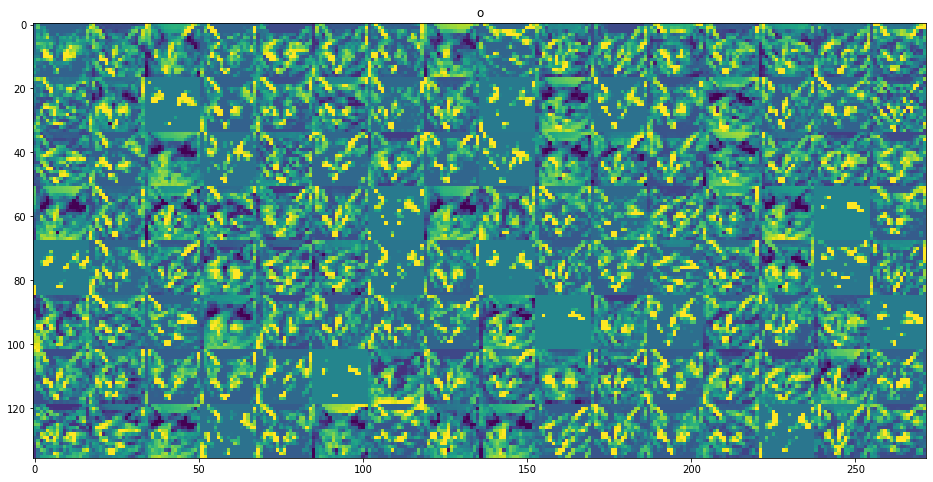

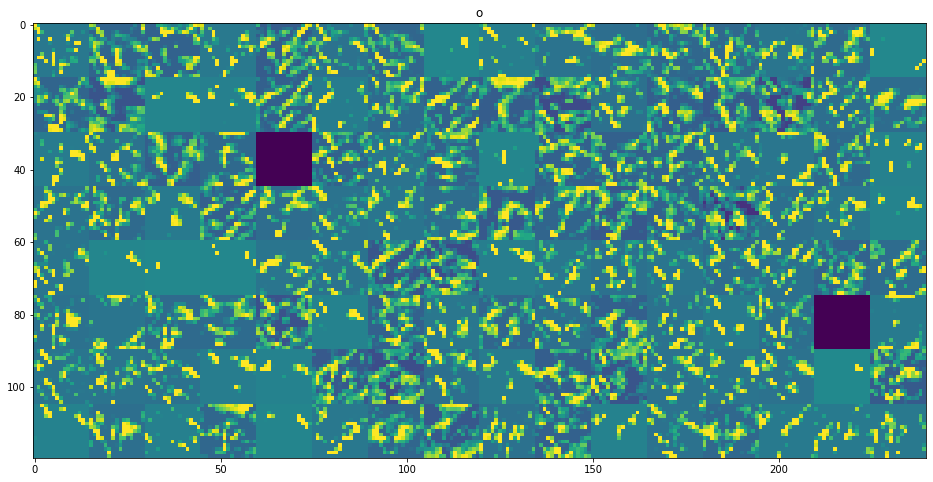

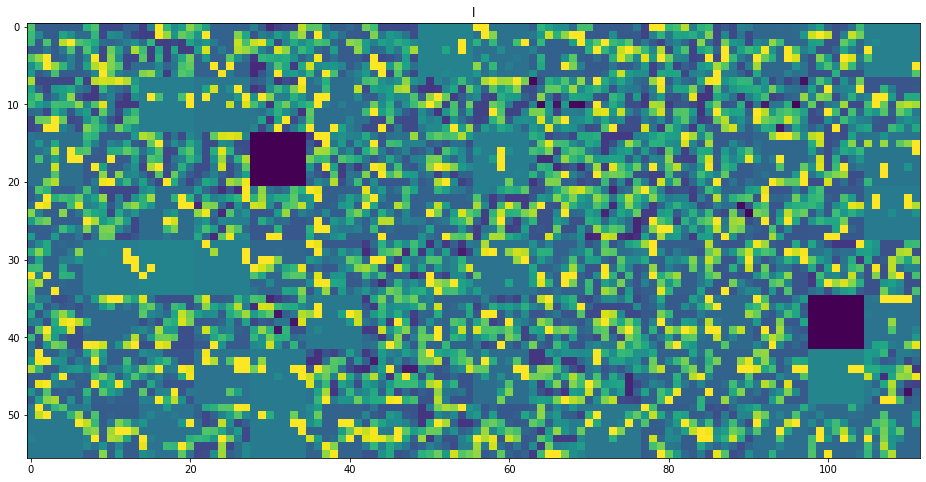

In [23]:
for layer_name, layer_activation in zip(layer_name, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size: (col+1)*size, row*size: (row+1)*size] = channel_image
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')